In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
# dataset: https://archive.ics.uci.edu/ml/datasets/seeds

In [3]:
df = pd.read_csv('../datasets/seeds.csv', header=None)

In [4]:
df.shape

(210, 8)

# 利用以上的seeds dataset，請利用Kmeans 進行clustering, 並設法找到最適合的number of clusters
請比照教材中的繪圖，將inertial 對 number of cluster的折線圖劃出 

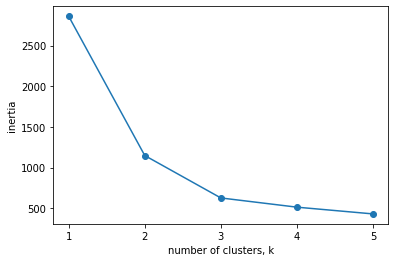

In [5]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
ks = range(1, 6)
inertias = []
samples = df.values
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)

    # Fit model to samples
    model.fit(samples)

    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)

# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [6]:
# 先指定centroids的位置及各cluster的標準差
blob_centers = np.array([[-0.2, 2.3], [1.5, 2.3], [2.8, 2.8], [2.8, 1.3],
                         [-1, -2], [-2, 2]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1, 0.2])
X, y = make_blobs(n_samples=300,
                  centers=blob_centers,
                  cluster_std=blob_std,
                  random_state=7)
# samples = df1.values

In [7]:
# 利用以上的dataset，請利用Kmeans 進行clustering, 並設法找到最適合的number of clusters

In [8]:
# k = 1~12 做十二次kmeans, 並將每次結果的inertia收集在一個list裡
kmeans_per_k = [
    KMeans(n_clusters=k, random_state=42).fit(X) for k in range(1, 12)
]

In [9]:
silhouette_scores = [
    silhouette_score(X, model.labels_) for model in kmeans_per_k[1:]
]

In [10]:
silhouette_scores

[0.5427375913936751,
 0.6845109336857429,
 0.6192378907977986,
 0.6607721802618234,
 0.7677954453085317,
 0.7349479771664882,
 0.7300645206249399,
 0.7036375772834557,
 0.708418031111932,
 0.6353131813697546]

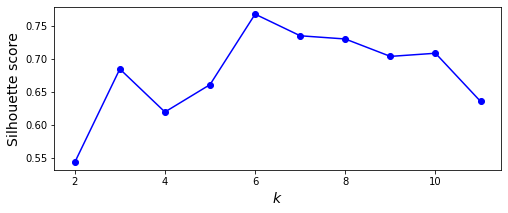

In [11]:
plt.figure(figsize=(8, 3))
plt.plot(range(2, 12), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
# plt.axis([1.8, 8.5, 0.55, 0.75])

plt.show()